In [1]:
import pandas as pd
import csv
import numpy as np

df = pd.read_csv("Dataset(SMOTE).csv", low_memory=False)
df

,label,file_access,pe_imports,sig_clamav,pe_sec_character,sig_antivirus_virustotal,cmd_exec,api_resolv,pe_sec_entropy,pe_sec_name,...,sig_antianalysis_detectfile,sig_network_cnc_http,sig_removes_zoneid_ads,sig_downloader_cabby,sig_sniffer_winpcap,sig_creates_largekey,sig_infostealer_bitcoin,sig_static_detection,sig_antiav_servicestop,sig_recon_beacon
0,0,764,129,560,81,2280,102,1302,1147,211,...,2,12,5,2,2,3,0,231,4,11
1,0,984,129,560,81,2018,112,1302,1147,211,...,2,12,5,2,2,3,0,231,4,11
2,0,2164,1394,560,77,2018,541,237,124,207,...,2,12,5,2,2,3,0,231,4,11
3,0,946,962,560,81,2214,527,1212,183,211,...,2,12,5,2,2,3,0,231,4,11
4,0,1743,1345,560,77,216,144,634,73,207,...,2,12,5,2,2,3,0,231,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,4,666,561,560,106,852,541,634,2102,232,...,2,12,5,2,2,3,0,230,4,11
10096,4,1099,427,560,107,2018,541,634,309,233,...,2,12,5,2,2,3,0,231,4,11
10097,4,1856,1407,560,81,1573,541,639,1626,211,...,2,12,5,2,2,3,0,71,4,11
10098,4,1846,1373,560,102,331,541,634,1354,230,...,2,12,5,2,2,3,0,118,4,11


In [2]:
from sklearn.model_selection import train_test_split

# Separating the features from the target variable
X = df.iloc[:, 1:65]
y = df['label']

# Splitting the data into a train and a dev set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = .3, random_state = 0) 
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = .4, random_state = 0) 

In [9]:
# Import the predicted values from the CSV file
dt_predict = np.genfromtxt('DT_Balanced(80-20).csv', delimiter=',')
dt2_predict = np.genfromtxt('DT_Balanced(70-30).csv', delimiter=',')
dt3_predict = np.genfromtxt('DT_Balanced(60-40).csv', delimiter=',')

C:\Users\user\AppData\Local\Temp\ipykernel_21384\3122611269.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(a)
C:\Users\user\AppData\Local\Temp\ipykernel_21384\3122611269.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_yticklabels(b)
C:\Users\user\AppData\Local\Temp\ipykernel_21384\3122611269.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(a)
C:\Users\user\AppData\Local\Temp\ipykernel_21384\3122611269.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_yticklabels(b)
C:\Users\user\AppData\Local\Temp\ipykernel_21384\3122611269.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(a)
C:\Users\user\AppData\Local\Temp\ipykernel_21384\3122611269.py:67: UserWarning: FixedFormatter should only be used together with FixedLocato

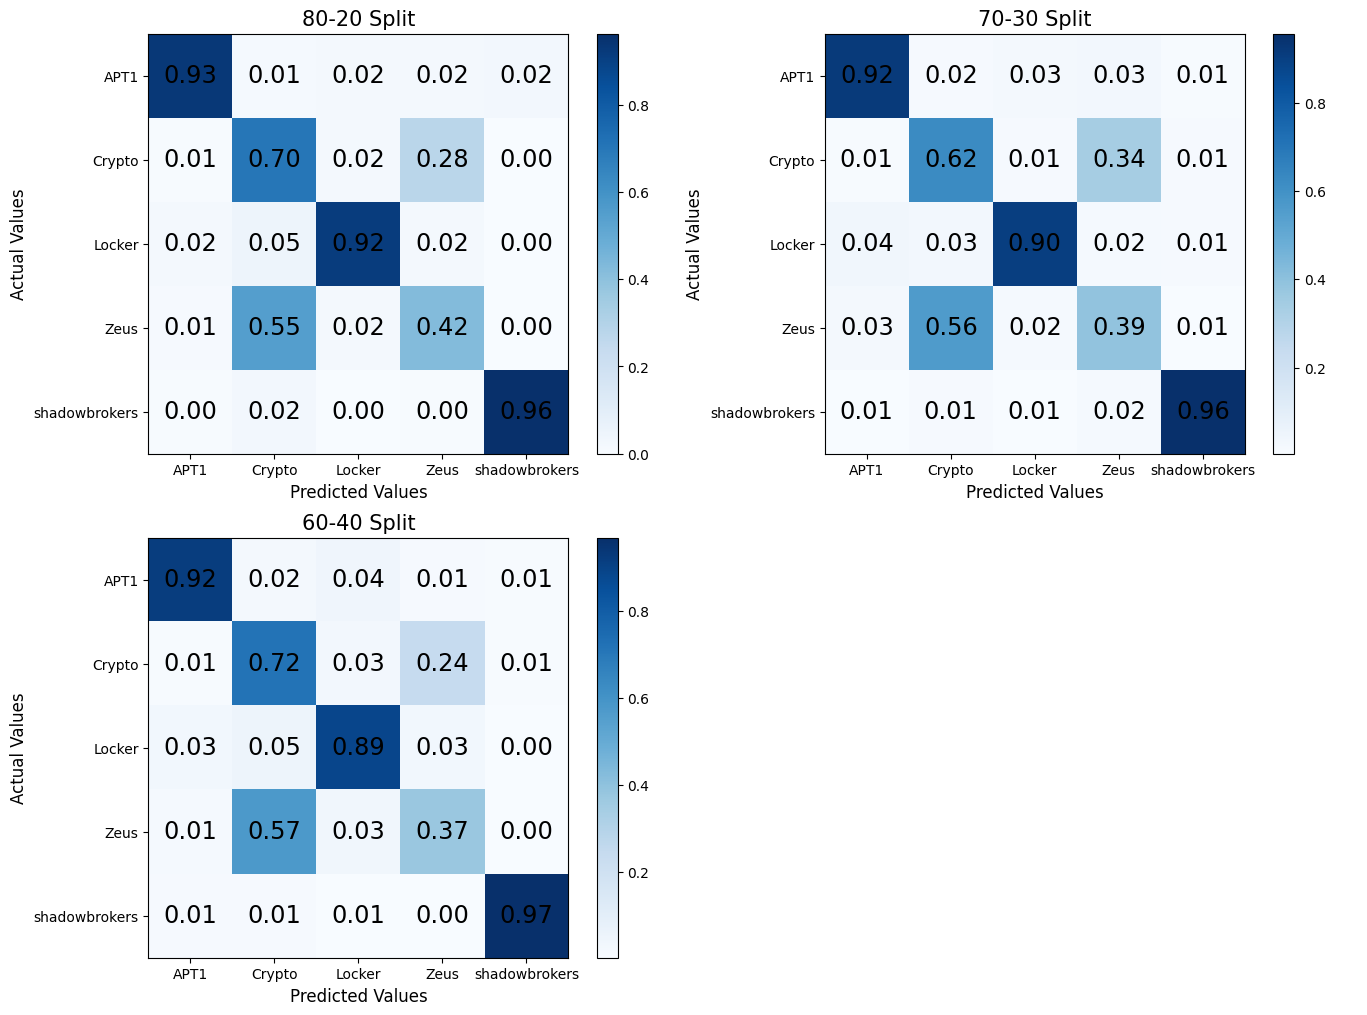

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Confusion Matrix 1
conf_matrix = metrics.confusion_matrix(y_test, dt_predict, normalize='true')

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Plotting Confusion Matrix 1
im1 = ax[0, 0].matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(im1, ax=ax[0, 0])
fmt = '.2f'
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax[0, 0].text(x=j, y=i, s=format(conf_matrix[i, j], fmt), va='center', ha='center', size='xx-large')

a = ax[0, 0].get_xticks().tolist()
a[1] = 'APT1'
a[2] = 'Crypto'
a[3] = 'Locker'
a[4] = 'Zeus'
a[5] = 'shadowbrokers'

b = ax[0, 0].get_yticks().tolist()
b[1] = 'APT1'
b[2] = 'Crypto'
b[3] = 'Locker'
b[4] = 'Zeus'
b[5] = 'shadowbrokers'
ax[0, 0].set_xticklabels(a)
ax[0, 0].set_yticklabels(b)

ax[0, 0].set_xlabel('Predicted Values', fontsize=12)
ax[0, 0].set_ylabel('Actual Values', fontsize=12)
ax[0, 0].xaxis.tick_bottom()
ax[0, 0].set_title('80-20 Split', fontsize=15)

# Confusion Matrix 2
conf_matrix2 = metrics.confusion_matrix(y2_test, dt2_predict, normalize='true')

# Plotting Confusion Matrix 2
im2 = ax[0, 1].matshow(conf_matrix2, cmap=plt.cm.Blues)
fig.colorbar(im2, ax=ax[0, 1])
for i in range(conf_matrix2.shape[0]):
    for j in range(conf_matrix2.shape[1]):
        ax[0, 1].text(x=j, y=i, s=format(conf_matrix2[i, j], fmt), va='center', ha='center', size='xx-large')

ax[0, 1].set_xticklabels(a)
ax[0, 1].set_yticklabels(b)

ax[0, 1].set_xlabel('Predicted Values', fontsize=12)
ax[0, 1].set_ylabel('Actual Values', fontsize=12)
ax[0, 1].xaxis.tick_bottom()
ax[0, 1].set_title('70-30 Split', fontsize=15)  # Add title for Confusion Matrix 2

# Confusion Matrix 3
conf_matrix3 = metrics.confusion_matrix(y3_test, dt3_predict, normalize='true')

# Plotting Confusion Matrix 3
im3 = ax[1, 0].matshow(conf_matrix3, cmap=plt.cm.Blues)
fig.colorbar(im3, ax=ax[1, 0])
for i in range(conf_matrix3.shape[0]):
    for j in range(conf_matrix3.shape[1]):
        ax[1, 0].text(x=j, y=i, s=format(conf_matrix3[i, j], fmt), va='center', ha='center', size='xx-large')

ax[1, 0].set_xticklabels(a)
ax[1, 0].set_yticklabels(b)

ax[1, 0].set_xlabel('Predicted Values', fontsize=12)
ax[1, 0].set_ylabel('Actual Values', fontsize=12)
ax[1, 0].xaxis.tick_bottom()
ax[1, 0].set_title('60-40 Split', fontsize=15)  # Add title for Confusion Matrix 2

# Remove empty graph in ax[1, 1]
ax[1, 1].axis('off')

plt.show()

In [3]:
# Import the predicted values from the CSV file
dt4_predict = np.genfromtxt('DT_BalancedXBoruta(80-20).csv', delimiter=',')
dt5_predict = np.genfromtxt('DT_BalancedXBoruta(70-30).csv', delimiter=',')
dt6_predict = np.genfromtxt('DT_BalancedXBoruta(60-40).csv', delimiter=',')

C:\Users\user\AppData\Local\Temp\ipykernel_21248\172045974.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(a)
C:\Users\user\AppData\Local\Temp\ipykernel_21248\172045974.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_yticklabels(b)
C:\Users\user\AppData\Local\Temp\ipykernel_21248\172045974.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(a)
C:\Users\user\AppData\Local\Temp\ipykernel_21248\172045974.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_yticklabels(b)
C:\Users\user\AppData\Local\Temp\ipykernel_21248\172045974.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(a)
C:\Users\user\AppData\Local\Temp\ipykernel_21248\172045974.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

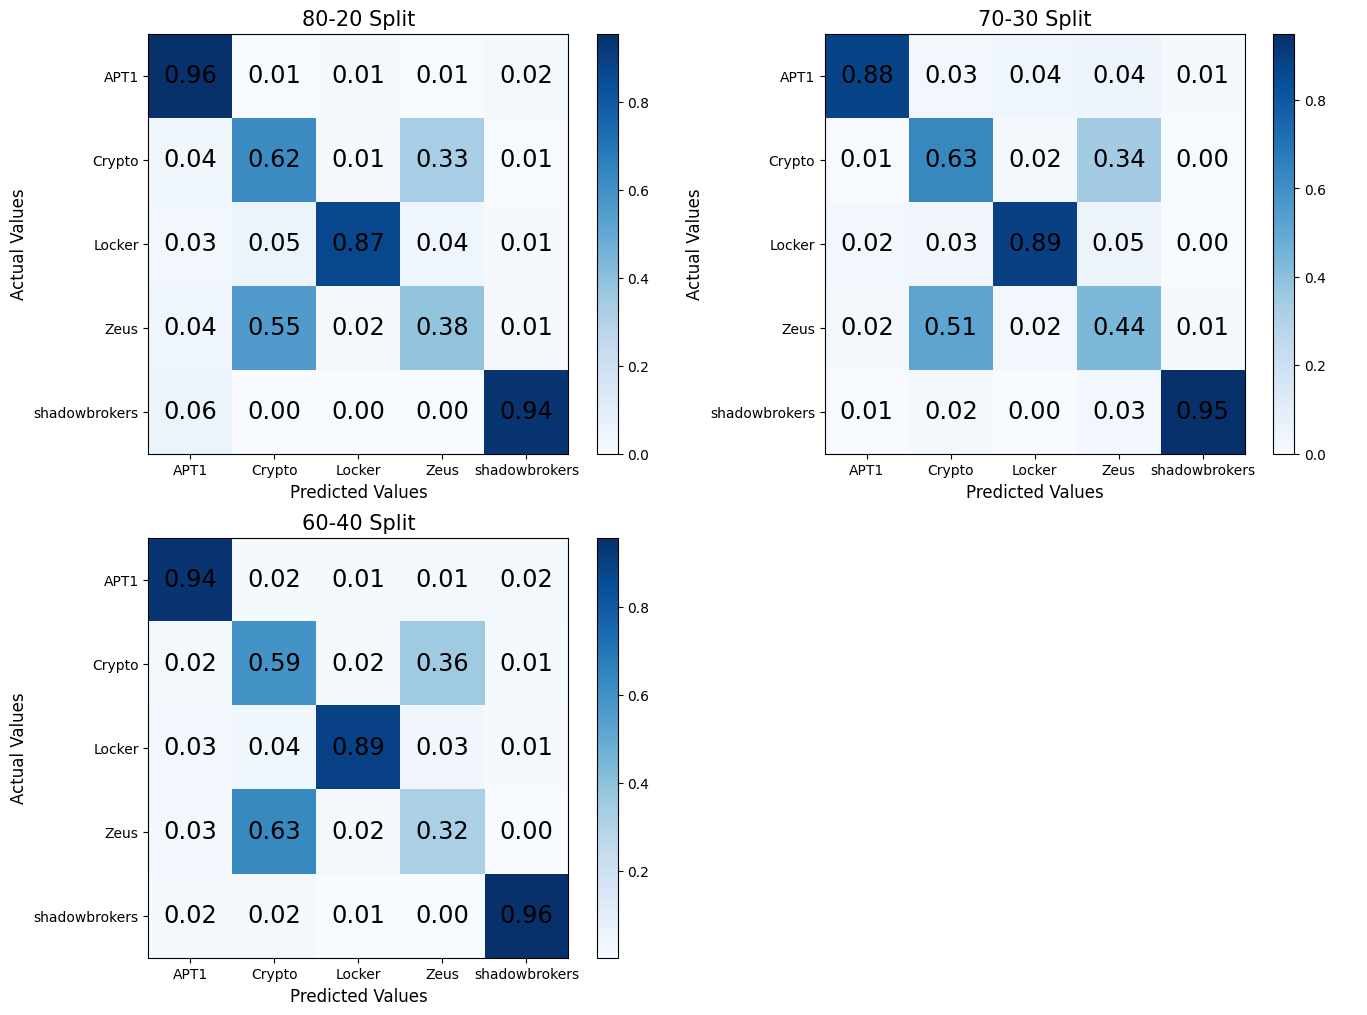

In [4]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Confusion Matrix 1
conf_matrix4 = metrics.confusion_matrix(y_test, dt4_predict, normalize='true')

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Plotting Confusion Matrix 1
im1 = ax[0, 0].matshow(conf_matrix4, cmap=plt.cm.Blues)
fig.colorbar(im1, ax=ax[0, 0])
fmt = '.2f'
for i in range(conf_matrix4.shape[0]):
    for j in range(conf_matrix4.shape[1]):
        ax[0, 0].text(x=j, y=i, s=format(conf_matrix4[i, j], fmt), va='center', ha='center', size='xx-large')

a = ax[0, 0].get_xticks().tolist()
a[1] = 'APT1'
a[2] = 'Crypto'
a[3] = 'Locker'
a[4] = 'Zeus'
a[5] = 'shadowbrokers'

b = ax[0, 0].get_yticks().tolist()
b[1] = 'APT1'
b[2] = 'Crypto'
b[3] = 'Locker'
b[4] = 'Zeus'
b[5] = 'shadowbrokers'
ax[0, 0].set_xticklabels(a)
ax[0, 0].set_yticklabels(b)

ax[0, 0].set_xlabel('Predicted Values', fontsize=12)
ax[0, 0].set_ylabel('Actual Values', fontsize=12)
ax[0, 0].xaxis.tick_bottom()
ax[0, 0].set_title('80-20 Split', fontsize=15)

# Confusion Matrix 2
conf_matrix5 = metrics.confusion_matrix(y2_test, dt5_predict, normalize='true')

# Plotting Confusion Matrix 2
im2 = ax[0, 1].matshow(conf_matrix5, cmap=plt.cm.Blues)
fig.colorbar(im2, ax=ax[0, 1])
for i in range(conf_matrix5.shape[0]):
    for j in range(conf_matrix5.shape[1]):
        ax[0, 1].text(x=j, y=i, s=format(conf_matrix5[i, j], fmt), va='center', ha='center', size='xx-large')

ax[0, 1].set_xticklabels(a)
ax[0, 1].set_yticklabels(b)

ax[0, 1].set_xlabel('Predicted Values', fontsize=12)
ax[0, 1].set_ylabel('Actual Values', fontsize=12)
ax[0, 1].xaxis.tick_bottom()
ax[0, 1].set_title('70-30 Split', fontsize=15)  # Add title for Confusion Matrix 2

# Confusion Matrix 3
conf_matrix6 = metrics.confusion_matrix(y3_test, dt6_predict, normalize='true')

# Plotting Confusion Matrix 3
im3 = ax[1, 0].matshow(conf_matrix6, cmap=plt.cm.Blues)
fig.colorbar(im3, ax=ax[1, 0])
for i in range(conf_matrix6.shape[0]):
    for j in range(conf_matrix6.shape[1]):
        ax[1, 0].text(x=j, y=i, s=format(conf_matrix6[i, j], fmt), va='center', ha='center', size='xx-large')

ax[1, 0].set_xticklabels(a)
ax[1, 0].set_yticklabels(b)

ax[1, 0].set_xlabel('Predicted Values', fontsize=12)
ax[1, 0].set_ylabel('Actual Values', fontsize=12)
ax[1, 0].xaxis.tick_bottom()
ax[1, 0].set_title('60-40 Split', fontsize=15)  # Add title for Confusion Matrix 2

# Remove empty graph in ax[1, 1]
ax[1, 1].axis('off')

plt.show()